# FIT5196 Assessment 3: Data Integration and Reshaping
#### Student Name: Vipul Jad
#### Student ID: 29520762
##### Date:26-oct-18
###### environment: Python 2.7.11 and Jupyter notebook  
## -------------------------------------------------------------------------------------------------------------------------
## TASK- 1
### 1. Importing Libraries
###### re (for regular expression, included in Anaconda Python 2.7) 
###### matplotlib for plotting 
###### shapely for polygons 
###### numpy and pandas for dataframe manupulations 
###### math and operator libraries for mathematical functions 

In [1]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import pandas as pa
import numpy
import matplotlib 
%matplotlib inline
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import numpy as np
import operator
import math
from math import sin, cos, sqrt, atan2, radians
from sklearn import preprocessing
from datetime import datetime
import time
import datetime

### 2. Reading Files.
######  Reading the Hospitals file 
- using pandas series and converting to a dataframe 

######  reading the RealState json file 
- with simple pandas function read_json

######  reading the Real State xml file using regeX
- extracting the XML file into a string using Beautiful Soap.
- extracting all the columns manually using regex. 
- appending into a dataframe using dictionary.

###### similarly reading Super Market as json file 
- using inbuild pandas function read_json

###### reading shopping center file xlsx
- using pandas read_xlsx

###### finally reading the train stop file 
- using simple read_csv

In [2]:
hsp= pa.read_html("hospitals.html" ) #reading the hospital.html file
hsp=hsp[0]
hsp.drop(hsp.columns[hsp.columns.str.contains('unnamed',case = False)],axis = 1,inplace=True)  #hospitals
hsp=hsp.drop_duplicates(keep=False, inplace=False)
rs=pa.read_json("real_state.json") # real statre json
from bs4 import BeautifulSoup
btree = BeautifulSoup(open("real_state.xml"),"lxml-xml") 
bet=str(btree)
import re
bathrs= str(re.findall(r"<bathrooms type=\"dict\">.*?</bathrooms>",bet))
pric=str(re.findall(r"<price type=\"dict\">.*?</price>",bet))
bedrs=re.findall(r"<bedrooms type=\"dict\">.*?</bedrooms>",bet)
pars=re.findall(r"<parking_space type=\"dict\">.*?</parking_space>",bet)
yea=re.findall(r"<year type=\"dict\">.*?</year>",bet)
la=re.findall(r"<lat type=\"dict\">.*?</lat>",bet)
lo=re.findall(r"<lng type=\"dict\">.*?</lng>",bet)
pt=re.findall(r"<property_type type=\"dict\">.*?</property_type>",bet)#str
ast=re.findall(r"<addr_street type=\"dict\">.*?</addr_street>",bet)#str
pid=re.findall(r"<property_id type=\"dict\">.*?</property_id>",bet)
bathrs=str(bathrs)
idn= re.findall(r"<n(.*?) type=\"number\">",bathrs)
bathrooms= re.findall(r"type=\"number\">(.*?|nan)<",bathrs)
prices= re.findall(r"type=\"number\">(.*?|nan)<",pric)
bedrooms= re.findall(r"type=\"number\">(.*?|nan)<",str(bedrs))
parking_space= re.findall(r"type=\"number\">(.*?|nan)<",str(pars))
year= re.findall(r"type=\"number\">(.*?|nan)<",str(yea))
lat= re.findall(r"type=\"number\">(.*?|nan)<",str(la))
lng= re.findall(r"type=\"number\">(.*?|nan)<",str(lo))
property_type= re.findall(r"\d+ type=.*?>(.*?|nan)<",str(pt))
addr_street= re.findall(r"\d+ type=.*?>(.*?|nan)<",str(ast))
property_id= re.findall(r"type=\"number\">(.*?|nan)<",str(pid))
xml_data = {'Id': idn,
         'bathrooms': bathrooms,
         'price': prices,
         'bedrooms': bedrooms,
         'parking_space': parking_space,   
         'year': year,
         'lat': lat,
         'lng': lng,
         'property_type': property_type,
         'addr_street': addr_street,
         'property_id': property_id   
}

rs1=pa.DataFrame
rs1=pa.DataFrame.from_dict(xml_data)  #real state xml
sc= pa.read_excel("shopingcenters.xlsx") #shopping center
sc=sc.drop_duplicates(keep=False, inplace=False)
sm = pa.read_json("supermarkets.json") #super markets
sm=sm.drop_duplicates(keep=False, inplace=False)
tra = pa.read_csv("stops.txt") #train stops
null_list = list(rs1[rs1.lat == 'nan'].index)
rs1 = rs1.drop(rs1.index[null_list]) 
rs1 = rs1.reset_index(drop=True) 

# Merging two Real State files (xml and json)
- dropping unwanted columns 
- appending the dataframes using concat function
- dropping duplicates
- resetting indexes
- converting datatypes of columns

In [3]:
rs1.drop(labels='Id',axis=1,inplace=True)

In [4]:

df_l= [rs,rs1]
res=pa.concat(df_l,ignore_index=True)
res.shape

(2011, 10)

In [5]:
res.lat = pa.to_numeric(res.lat)
res.lng = pa.to_numeric(res.lng)
res.bathrooms = pa.to_numeric(res.bathrooms)
res.bedrooms = pa.to_numeric(res.bedrooms)
res.parking_space = pa.to_numeric(res.parking_space)
res.price = pa.to_numeric(res.price)
res.property_id = pa.to_numeric(res.property_id)
res.year = pa.to_numeric(res.year)
res.shape

(2011, 10)

In [6]:
res.drop_duplicates(keep=False, inplace=True)
res=res.dropna()
#print(res)
res = res.reset_index()
res=res.drop(["index"],axis=1) 
#res["price"]=res["price"].astype('float64')
res.shape

(1952, 10)

In [7]:
res

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,21 Carbine Avenue,3.0,5.0,-37.942090,145.104637,1.0,13855000.0,77165.0,house,2015.0
1,7/23 Olive Grove,1.0,1.0,-37.983856,145.079239,1.0,3825000.0,92417.0,house,2009.0
2,5 Cassia Court,2.0,4.0,-37.841371,145.220835,3.0,10400000.0,71604.0,house,2016.0
3,7 Vassar Court,2.0,5.0,-37.844545,144.726479,2.0,5016000.0,9641.0,house,2014.0
4,29 Esdale Street,3.0,5.0,-37.812592,145.165357,2.0,15750000.0,57933.0,house,2013.0
5,9 Woodland Grove,1.0,3.0,-37.713739,145.129874,2.0,5175000.0,46287.0,house,2012.0
6,42 Carnarvon Road,3.0,3.0,-37.737615,144.911400,2.0,11700000.0,15313.0,house,2015.0
7,36A Canonbury Circle,1.0,2.0,-37.881504,144.758632,1.0,5194000.0,9052.0,house,2016.0
8,155 Murray Road,1.0,3.0,-37.739052,145.012283,2.0,4280000.0,31968.0,house,2009.0
9,9 Jago Street,1.0,3.0,-37.824074,145.011444,0.0,7150000.0,53888.0,house,2009.0


# Finding nearest places using Euclids distance calculator
- defining a function to calculate distance using latitudes and longitudes


In [8]:
def distance(lat1,lat2,lat3,lat4):
# approximate radius of earth in km
    R = 6378
    lat1 = radians(float(lat1))
    lon1 = radians(float(lat2))
    lat2 = radians(float(lat3))
    lon2 = radians(float(lat4))
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = (R * c)
    return(distance)   

## Finding nearest Hospitals and appending tha ids and distance into a list

In [9]:
hsp_resl=[]
hsp_disl=[]
hsp_nam=[]
for i in range(len(res["bathrooms"])):
    dl=[]
    for j in range(len(hsp['id'])):
        dl.append(distance(res['lat'][i],res['lng'][i],hsp['lat'][j],hsp['lng'][j]))
        
        minim=dl.index(min(dl))
    #print(i,minim,round(min(dl)*100,2))
    hsp_resl.append(hsp["id"][minim])
    hsp_nam.append(hsp["name"][minim])
    hsp_disl.append(round(min(dl)*1000))

## Finding nearest shopping centers and appending tha ids and distance into a list

In [10]:
sc

,sc_id,lat,lng
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472
2,SC_003,-37.971131,145.089065
3,SC_004,-35.280406,149.132550
4,SC_005,-37.574572,144.920452
5,SC_006,-38.355943,144.907320
6,SC_007,-37.812680,144.962905
7,SC_008,-37.811846,144.969834
8,SC_009,-37.765650,145.091914
9,SC_010,-37.714111,144.886988


In [11]:
sc_resl=[]
sc_disl=[] 
sc_nam=[]
for i in range(len(res["bathrooms"])):
    dl=[]
    for j in range(len(sc['sc_id'])):
        dl.append(distance(res['lat'][i],res['lng'][i],sc['lat'][j],sc['lng'][j]))
        minim=dl.index(min(dl))
    #print(i,minim,round(min(dl)*100,2))
    sc_resl.append(sc["sc_id"][minim])
    sc_disl.append(round(min(dl)*1000)) 

## Finding nearest supermarkets and appending tha ids and distance into a list

In [12]:
sm_resl=[]
sm_disl=[] 
for i in range(len(res["bathrooms"])):
    dl=[]
    for j in range(len(sm['id'])):
        dl.append(distance(res['lat'][i],res['lng'][i],sm['lat'][j],sm['lng'][j]))
        minim=dl.index(min(dl))
    #print(i,minim,round(min(dl)*100,2))
    sm_resl.append(sm["id"][minim])
    sm_disl.append(round(min(dl)*1000))  

## Finding nearest Train Station and appending tha Ids and distance into a list

In [13]:
tra_resl=[]
tra_disl=[]
for i in range(len(res["bathrooms"])):
    dl=[]
    for j in range(len(tra['﻿stop_id'])):
        dl.append(distance(res['lat'][i],res['lng'][i],tra['stop_lat'][j],tra['stop_lon'][j]))
        minim=dl.index(min(dl))
    #print(i,minim,round(min(dl)*100,2))
    tra_resl.append(tra['﻿stop_id'][minim])
    tra_disl.append(round(min(dl)*1000))  

### Appending the calculated values into the dataframe 
- the values that were stored into the lists are to be appended into the dataframe .

In [14]:
res["shopping_center_id"]=sc_resl
res["distance_to_sc"]=sc_disl
res["hospital_id"]=hsp_resl
res["distance_to_hospital"]=hsp_disl
res["supermarket_id"]=sm_resl
res["distance_to_supermaket"]=sm_disl
res["train_station_id"]=tra_resl
res["distance_to_train_station"]=tra_disl

# Finding the Region of each RealState given
- First we need to append the shapefiles into a dataframe using the function given below we can convert the shapefile to a dataframa (reference: https://gist.github.com/aerispaha/f098916ac041c286ae92d037ba5c37ba)
- using the latitudes and longitudes of the realstate we find out that the point lies within the region 
- using polygon and point functions in Shapely we cand deduce that if a point lies inside a polygon 
- by using polygon.contains(point) functions which returns true if the point is present inside the polygon

In [15]:
import shapefile
p="VIC_LOCALITY_POLYGON_shp"
def read_shapes(file):
    sf = shapefile.Reader(file)
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pa.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df
reg=read_shapes(p)
import numpy as np
res['suburb'] = pa.Series(np.random.randn(len(res["bathrooms"])), index=res.index)
c=0
reg_nam=[]

for i in range (len(reg["coords"])):
    x=reg["coords"][i]
    nl=[]
    for m in x:
        tup=(m[1],m[0])
        nl.append(tup)
    poly=Polygon(nl)
    for j in range(len(res["bathrooms"])):
            point=Point(float(res["lat"][j]),float(res["lng"][j]))
            if poly.contains(point)==True:
                res["suburb"][j]=(reg["VIC_LOCA_2"][i])
                #print(res["suburb"][j],float(res["lat"][j]),float(res["lng"][j]))
                c+=1
                print(c)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952


## Travel Min To CBD and Transfer Flag
- Rading the datasets into pirticular dataframes

In [16]:
tra_st = pa.read_csv("stop_times.txt")
tra_cal = pa.read_csv("calendar.txt")
trips=pa.read_csv("trips.txt")

#### Finding out the services that run on all the five days 
- we noticed from the table that service "T0" runs every 5 days .

In [17]:
week_ids=[]
for i in range (len(tra_cal["﻿service_id"])):
    if tra_cal["monday"][i]==1:
        week_ids.append(tra_cal["﻿service_id"][i])
    if tra_cal["tuesday"][i]==1:
        week_ids.append(tra_cal["﻿service_id"][i])
    if tra_cal["wednesday"][i]==1:
        week_ids.append(tra_cal["﻿service_id"][i]) 
    if tra_cal["thursday"][i]==1:
        week_ids.append(tra_cal["﻿service_id"][i])
    if tra_cal["friday"][i]==1:
        week_ids.append(tra_cal["﻿service_id"][i])    
lis=[]
for i in week_ids:
       if i not in lis:
            lis.append(i)
lis   

['T6',
 'T5',
 'T6_1',
 'T5_1',
 'T0',
 'T0+a6',
 'T0+a5',
 'T5+tg',
 'T5+ph',
 'T5+tg_1',
 'T5+ph_1',
 'T5+ao',
 'T5+ta']

 #### Fetching the trips that are between the time 7 to 9 
 - but in this case we will take time limit till 11 am as stated in the lecture

In [18]:
tt_id=[]
vc=0
for i in range(len(tra_st["departure_time"])):
    h=0
    #print(tra_st["departure_time"][i])
    if re.search(r'\d+:\d+:\d+',tra_st["departure_time"][i]):
        vc+=1
        h=re.search(r'(\d+):\d+:\d+',tra_st["departure_time"][i]).group(1)
        tripid = tra_st['﻿trip_id'][i].split(".")[1]
        if int(h)>=7 and int(h)<11:
            if tripid=='T0':
                tt_id.append(tra_st["﻿trip_id"][i])
            

- Filtering the dataframe with only TRIP IDs that are within the time limit to make our code more optimized and run fast in later use 

In [19]:
#n_tr_st=tra_st.iloc[tt_id]
n_tr_st=tra_st.loc[tra_st['﻿trip_id'].isin(tt_id)]

In [20]:
n_tr_st=n_tr_st.reset_index(drop=True) ## reseting the index

In [21]:
n_tr_st.shape #checking the shape 

(14045, 9)

### Finding all the trips and stations covered within the trip and appending them to a dictionary
- we used our filtered dataframe we created above and found all the trips which run towards flinders street
-  in the GTFS stops.txt data the flinders street has a station ID '19854'
- using this data we can find all the trains running towards CBD

In [22]:
station_routes={}
for i in range(len(n_tr_st['﻿trip_id'])):
    x = n_tr_st['﻿trip_id'][i]
    y = n_tr_st['stop_id'][i]
    dep = n_tr_st['departure_time'][i]
    temp = int(dep.split(":")[0])
    if( temp < 9)  or ( y == 19854 ) :
        if( x not in list(station_routes.keys()) ):
            station_routes[x] = [y]
        else:
            station_routes[x].append(y)

In [23]:
x = []
for each in station_routes:
    if(len(station_routes[each]) <2 ):
        x.append(each)

In [24]:
for each in x:
    del station_routes[each]

In [25]:
x = []
for a,b in station_routes.items():
    x.append(b)
n=[]
for each in x:
    for ids in each:
        n.append(ids)
train_id_list=[]
for m in n:
    if m not in train_id_list:
        train_id_list.append(m)        

- calculating transfer flags if there is NO direct train to the CITY the transfer flag will be 1 else -0
- appending each calculated transfer flag into a list

In [26]:
res["transfer_flag"] = -1
flag_train = []
for each_id in range(len(res.train_station_id)):
    near_stat = (res.train_station_id[each_id])
    flag = 1
    for each_route_id in station_routes:
        if( near_stat in station_routes[each_route_id] ) & ( 19854 in station_routes[each_route_id] ):
            flag = 0
    flag_train.append(flag)

- Counting the number of transfer flag where no direct train to the CITY
- And appending into a list

In [27]:
tc=0
for m in flag_train:
    if m==1:
        tc+=1
print(tc)
res['transfer_flag']=flag_train        

2


In [28]:
res.columns

Index([              u'addr_street',                 u'bathrooms',
                        u'bedrooms',                       u'lat',
                             u'lng',             u'parking_space',
                           u'price',               u'property_id',
                   u'property_type',                      u'year',
              u'shopping_center_id',            u'distance_to_sc',
                     u'hospital_id',      u'distance_to_hospital',
                  u'supermarket_id',    u'distance_to_supermaket',
                u'train_station_id', u'distance_to_train_station',
                          u'suburb',             u'transfer_flag'],
      dtype='object')

In [29]:
def time_calc(a):
    return(time.mktime(datetime.datetime.strptime(a, "%H:%M:%S").timetuple()))

In [30]:
len(station_routes)

498

In [31]:
station_routes['17067064.T0.2-EPP-F-mjp-1.8.R']

[45795,
 20005,
 20006,
 20007,
 20008,
 20009,
 20010,
 20011,
 20012,
 20013,
 20014,
 20015,
 20016,
 20017,
 20019,
 19974,
 19975,
 19976,
 19977,
 19978,
 19979,
 19854,
 22180,
 19841,
 19842,
 19843]

In [32]:
def diff_times_in_seconds(t1, t2):
    # caveat emptor - assumes t1 & t2 are python times, on the same day and t2 is after t1
    h1, m1, s1 = t1.hour, t1.minute, t1.second
    h2, m2, s2 = t2.hour, t2.minute, t2.second
    t1_secs = s1 + 60 * (m1 + 60*h1)
    t2_secs = s2 + 60 * (m2 + 60*h2)
    return( t2_secs - t1_secs)


### caclulating time to CBD
- taking the total stops in the route 
- counting the total number of services
- taking mean of total time

In [33]:
time_list=[]
import datetime 
from datetime import datetime
for i in range(len(res.train_station_id)):
    count=[]
    tot_tr=0
    trainid = res.train_station_id[i]
    tf= res['transfer_flag'][i]
    cbd=19854
    #print(trainid)
    work1 = []
    for route in station_routes:
        if((trainid in station_routes[route]) and (cbd in station_routes[route]) ):
            start = station_routes[route].index(trainid)
            end = station_routes[route].index(cbd)
            if(start<end):
                #print(station_routes[route])
                work1.append(route)
    
    no_of_s =len(work1)
    total_serv = 0
    tt= 0

    for each3 in work1:
        #print(i)
        total_serv+=1
        df1 = n_tr_st[n_tr_st["﻿trip_id"] == each3]
        pppp1 = [trainid, cbd]
        #print(pppp1)
        pppp = df1.loc[df1['stop_id'].isin(pppp1)]
        
        dep_time =str(re.search(r'(\d+:\d+:\d+)',pppp["departure_time"][list(pppp["arrival_time"].index)[0]]).group(1))
        #print(dep_time)
        arr_time =str(re.search(r'(\d+:\d+:\d+)',pppp["arrival_time"][list(pppp["arrival_time"].index)[1] ] ).group(1))
        #print(pppp["arrival_time"][list(pppp["arrival_time"].index)[1] ])
        ar=(datetime.strptime( arr_time, '%H:%M:%S'))
        de=(datetime.strptime(dep_time, '%H:%M:%S'))
        z=ar-de
        #print(z.seconds)
        tt+=(z.seconds/60)
    if total_serv!=0:
        time_list.append(tt/total_serv)
    else:
        time_list.append(0)
    
    

In [34]:
res['travel_min_to_CBD']=time_list #appending into dataframe 

### Modifying the final DataFrame.
- rearranging columns as given in the sample.csv
- And changing the datatypes of each column respectively

In [35]:
res=res[['property_id','lat','lng','addr_street','suburb','price','property_type','year','bedrooms','bathrooms','parking_space','shopping_center_id','distance_to_sc','train_station_id','distance_to_train_station','travel_min_to_CBD','transfer_flag','hospital_id','distance_to_hospital','supermarket_id','distance_to_supermaket']]

In [36]:
res["property_id"]=res["property_id"].astype('object')
res["lat"]=res["lat"].astype('float64')
res["lng"]=res["lng"].astype('float64')
res["addr_street"]=res["addr_street"].astype('object')
res["suburb"]=res["suburb"].astype('object')
res["price"]=res["price"].astype('float64')
res["property_type"]=res["property_type"].astype('object')
res["year"]=res["year"].astype('int64')
res["bedrooms"]=res["bedrooms"].astype('int64')
res["bathrooms"]=res["bathrooms"].astype('int64')
res["parking_space"]=res["parking_space"].astype('int')
res["shopping_center_id"]=res["shopping_center_id"].astype('object')
res["distance_to_sc"]=res["distance_to_sc"].astype('float64')
res["train_station_id"]=res["train_station_id"].astype('int64')
res["distance_to_train_station"]=res["distance_to_train_station"].astype('float64')
res["travel_min_to_CBD"]=res["travel_min_to_CBD"].astype('float64')
res["transfer_flag"]=res["transfer_flag"].astype('int64')
res["hospital_id"]=res["hospital_id"].astype('object')
res["distance_to_hospital"]=res["distance_to_hospital"].astype('float64')
res["supermarket_id"]=res["supermarket_id"].astype('object')
res["distance_to_supermaket"]=res["distance_to_supermaket"].astype('float64')


In [37]:
res.to_csv("29520762_solution.csv")

#  TASK -2
- MinMaxn Normalization

In [38]:
new_df=res #copying the dataframe, 

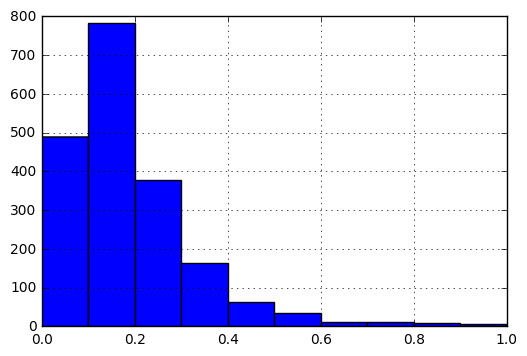

In [39]:
sc = preprocessing.MinMaxScaler().fit(new_df[['bedrooms', 'bathrooms','parking_space','price']])#fit
m_df = sc.transform(new_df[['bedrooms', 'bathrooms','parking_space','price']]) #transform
m_df=pa.DataFrame(m_df) #make dataframe 
new_df['bedrooms_minmax'] = m_df[0]   
new_df['bathrooms_minmax'] = m_df[1] 
new_df['parking_space_minmax'] = m_df[2] 
new_df['price_minmax'] = m_df[3] 
new_df['price_minmax'].hist()

- Z Score Normalization

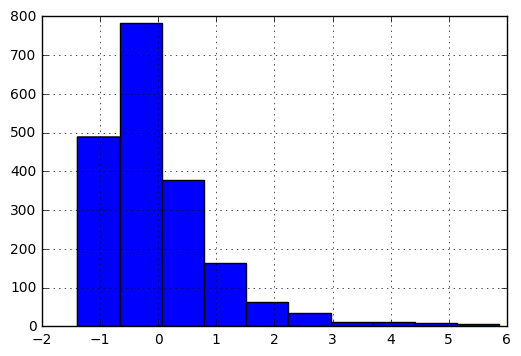

In [40]:
scale = preprocessing.StandardScaler().fit(new_df[['bedrooms', 'bathrooms','parking_space','price']])
z_df = scale.transform(new_df[['bedrooms', 'bathrooms','parking_space','price']]) 
z_df=pa.DataFrame(z_df)

new_df['bedroomsZ_S'] = z_df[0] 
new_df['bathroomsZ_S'] = z_df[1] 
new_df['parking_spaceZ_S'] = z_df[2] 
new_df['priceZ_S'] = z_df[3] 
new_df['priceZ_S'].hist()

- Square Transformation 

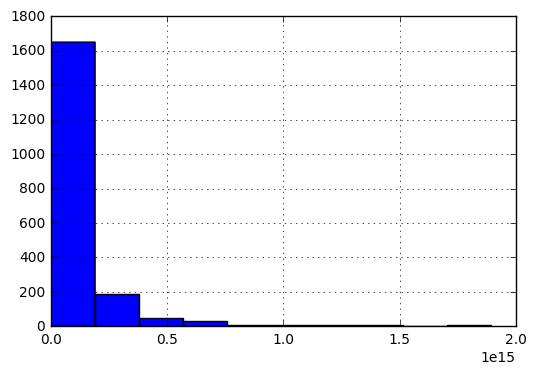

In [41]:
#new_df=res
new_df['price_transformed_square'] = (new_df.apply(lambda m: math.pow(m['price'], 2), axis = 1)).astype('float64')
new_df['price_transformed_square'].hist()

- Root Transformation:

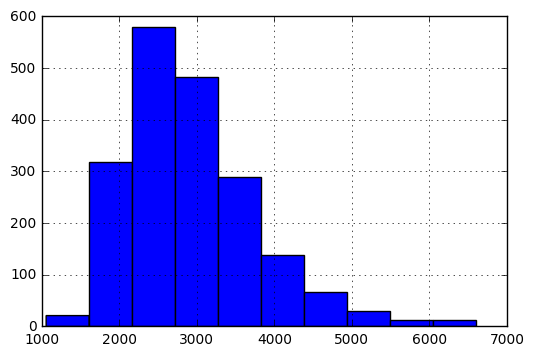

In [42]:
new_df['price_transformed_root'] = new_df.apply(lambda m: math.sqrt(m['price']), axis = 1)
new_df['price_transformed_root'].hist()

- Log Transformation

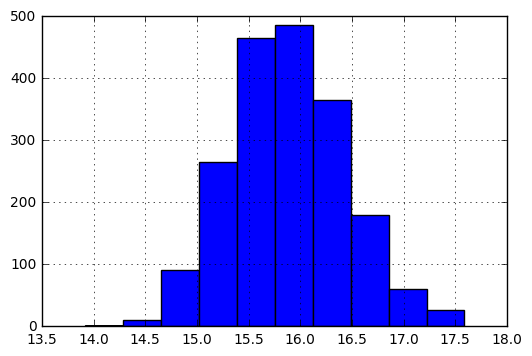

In [43]:
new_df['price_transformed_log'] = new_df.apply(lambda m: math.log(m['price']), axis = 1)
new_df['price_transformed_log'].hist()

In [44]:
new_df

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,bathrooms_minmax,parking_space_minmax,price_minmax,bedroomsZ_S,bathroomsZ_S,parking_spaceZ_S,priceZ_S,price_transformed_square,price_transformed_root,price_transformed_log
0,77165,-37.942090,145.104637,21 Carbine Avenue,CLARINDA,13855000.0,house,2015,5,3,...,1.0,0.333333,0.300494,2.363487,2.320902,-0.715141,0.791449,1.919610e+14,3722.230514,16.444157
1,92417,-37.983856,145.079239,7/23 Olive Grove,MENTONE,3825000.0,house,2009,1,1,...,0.0,0.333333,0.063985,-2.960837,-0.958433,-0.715141,-0.925542,1.463062e+13,1955.760722,15.157069
2,71604,-37.841371,145.220835,5 Cassia Court,WANTIRNA,10400000.0,house,2016,4,2,...,0.5,1.000000,0.219024,1.032406,0.681235,1.836881,0.200003,1.081600e+14,3224.903099,16.157316
3,9641,-37.844545,144.726479,7 Vassar Court,TRUGANINA,5016000.0,house,2014,5,2,...,0.5,0.666667,0.092069,2.363487,0.681235,0.560870,-0.721660,2.516026e+13,2239.642829,15.428143
4,57933,-37.812592,145.165357,29 Esdale Street,BLACKBURN,15750000.0,house,2013,5,3,...,1.0,0.666667,0.345178,2.363487,2.320902,0.560870,1.115846,2.480625e+14,3968.626967,16.572351
5,46287,-37.713739,145.129874,9 Woodland Grove,MONTMORENCY,5175000.0,house,2012,3,1,...,0.0,0.666667,0.095818,-0.298675,-0.958433,0.560870,-0.694441,2.678062e+13,2274.862633,15.459350
6,15313,-37.737615,144.911400,42 Carnarvon Road,STRATHMORE,11700000.0,house,2015,3,3,...,1.0,0.666667,0.249679,-0.298675,2.320902,0.560870,0.422545,1.368900e+14,3420.526275,16.275099
7,9052,-37.881504,144.758632,36A Canonbury Circle,SEABROOK,5194000.0,house,2016,2,1,...,0.0,0.333333,0.096266,-1.629756,-0.958433,-0.715141,-0.691189,2.697764e+13,2279.034883,15.463015
8,31968,-37.739052,145.012283,155 Murray Road,PRESTON,4280000.0,house,2009,3,1,...,0.0,0.666667,0.074714,-0.298675,-0.958433,0.560870,-0.847652,1.831840e+13,2068.816087,15.269464
9,53888,-37.824074,145.011444,9 Jago Street,RICHMOND,7150000.0,house,2009,3,1,...,0.0,0.000000,0.142389,-0.298675,-0.958433,-1.991153,-0.356350,5.112250e+13,2673.948391,15.782623


- we have done nornalization and transformation in the above graphs 
-  normalization makes the spread of the graph better 
- whereas transformation impacts the distribution of data
- in the above processes of normalization and transformation we can see that the spread of the LOG TRANSFORMATION is better if compared with any other graph,which will certainly help in building a good linear model 
- For a good linear model we need a better spread and distribution 
- log transformation accompalishes both the above requirements 
- therefor log transformation will be done before any other normalization or transformaiton
- After Log transformatio we can either go for Z Score Normalization or Minimax normalization as appearently there is not much noticable difference between them and make a better distribution and spread of data